In [1]:
# Import Libraries
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt

In [2]:
# Notebook options
import os

# change working directory
os.chdir('C:\Repos\quant-trading-suite')
print(os.getcwd())

C:\Repos\quant-trading-suite


In [19]:
# Import Single Asset Price data

SYMBOL = 'MATICUSDT'
INTERVAL = '1H'

con = sqlite3.connect('data/securities_master.db')
c = con.cursor()

# get column names
query = """
PRAGMA table_info(KLINES_1H)
"""
c.execute(query)
cols = c.fetchall()
col_names = [col[1] for col in cols]

# get klines
query = f"""
SELECT * FROM KLINES_1H
WHERE SYMBOL = '{SYMBOL}'
"""
c.execute(query)
data = pd.DataFrame(c.fetchall(), columns=col_names)

data.head()


,Exchange,Product_Type,Symbol,Time,Open,High,Low,Close,Volume,Load_time
0,Bybit,linear,MATICUSDT,2021-06-29 06:00:00,1.1453,1.1520,1.1449,1.1514,19434.0,2023-11-16 15:35:54
1,Bybit,linear,MATICUSDT,2021-06-29 07:00:00,1.1514,1.1538,1.1324,1.1377,225052.0,2023-11-16 15:35:54
2,Bybit,linear,MATICUSDT,2021-06-29 08:00:00,1.1377,1.1505,1.1297,1.1489,211671.0,2023-11-16 15:35:54
3,Bybit,linear,MATICUSDT,2021-06-29 09:00:00,1.1489,1.1581,1.1413,1.1550,181667.0,2023-11-16 15:35:54
4,Bybit,linear,MATICUSDT,2021-06-29 10:00:00,1.1550,1.1817,1.1473,1.1817,198017.0,2023-11-16 15:35:54


In [20]:
data['return'] = data['Close'].pct_change(1)
data.head()

,Exchange,Product_Type,Symbol,Time,Open,High,Low,Close,Volume,Load_time,return
0,Bybit,linear,MATICUSDT,2021-06-29 06:00:00,1.1453,1.1520,1.1449,1.1514,19434.0,2023-11-16 15:35:54,NaN
1,Bybit,linear,MATICUSDT,2021-06-29 07:00:00,1.1514,1.1538,1.1324,1.1377,225052.0,2023-11-16 15:35:54,-0.011899
2,Bybit,linear,MATICUSDT,2021-06-29 08:00:00,1.1377,1.1505,1.1297,1.1489,211671.0,2023-11-16 15:35:54,0.009844
3,Bybit,linear,MATICUSDT,2021-06-29 09:00:00,1.1489,1.1581,1.1413,1.1550,181667.0,2023-11-16 15:35:54,0.005309
4,Bybit,linear,MATICUSDT,2021-06-29 10:00:00,1.1550,1.1817,1.1473,1.1817,198017.0,2023-11-16 15:35:54,0.023117


In [21]:
data['ret(t+1)'] = data['return'].shift(-1)
data.head()

,Exchange,Product_Type,Symbol,Time,Open,High,Low,Close,Volume,Load_time,return,ret(t+1)
0,Bybit,linear,MATICUSDT,2021-06-29 06:00:00,1.1453,1.1520,1.1449,1.1514,19434.0,2023-11-16 15:35:54,NaN,-0.011899
1,Bybit,linear,MATICUSDT,2021-06-29 07:00:00,1.1514,1.1538,1.1324,1.1377,225052.0,2023-11-16 15:35:54,-0.011899,0.009844
2,Bybit,linear,MATICUSDT,2021-06-29 08:00:00,1.1377,1.1505,1.1297,1.1489,211671.0,2023-11-16 15:35:54,0.009844,0.005309
3,Bybit,linear,MATICUSDT,2021-06-29 09:00:00,1.1489,1.1581,1.1413,1.1550,181667.0,2023-11-16 15:35:54,0.005309,0.023117
4,Bybit,linear,MATICUSDT,2021-06-29 10:00:00,1.1550,1.1817,1.1473,1.1817,198017.0,2023-11-16 15:35:54,0.023117,0.010493


In [22]:
# Caculate the 2 period cumulative return 
data['cret(t+2)'] = data['Close'].pct_change(2).shift(-2)
data.head()

,Exchange,Product_Type,Symbol,Time,Open,High,Low,Close,Volume,Load_time,return,ret(t+1),cret(t+2)
0,Bybit,linear,MATICUSDT,2021-06-29 06:00:00,1.1453,1.1520,1.1449,1.1514,19434.0,2023-11-16 15:35:54,NaN,-0.011899,-0.002171
1,Bybit,linear,MATICUSDT,2021-06-29 07:00:00,1.1514,1.1538,1.1324,1.1377,225052.0,2023-11-16 15:35:54,-0.011899,0.009844,0.015206
2,Bybit,linear,MATICUSDT,2021-06-29 08:00:00,1.1377,1.1505,1.1297,1.1489,211671.0,2023-11-16 15:35:54,0.009844,0.005309,0.028549
3,Bybit,linear,MATICUSDT,2021-06-29 09:00:00,1.1489,1.1581,1.1413,1.1550,181667.0,2023-11-16 15:35:54,0.005309,0.023117,0.033853
4,Bybit,linear,MATICUSDT,2021-06-29 10:00:00,1.1550,1.1817,1.1473,1.1817,198017.0,2023-11-16 15:35:54,0.023117,0.010493,0.028095


In [23]:
subset = data[data['return'] > 0.05]
subset

,Exchange,Product_Type,Symbol,Time,Open,High,Low,Close,Volume,Load_time,return,ret(t+1),cret(t+2)
510,Bybit,linear,MATICUSDT,2021-07-20 12:00:00,0.6601,0.7073,0.6598,0.6947,2010516.0,2023-11-16 15:35:54,0.052416,-0.036275,-0.012235
513,Bybit,linear,MATICUSDT,2021-07-20 15:00:00,0.6862,0.7286,0.6781,0.7237,1814650.0,2023-11-16 15:35:54,0.054649,-0.040072,-0.036894
526,Bybit,linear,MATICUSDT,2021-07-21 04:00:00,0.7063,0.7617,0.7061,0.7547,2325777.0,2023-11-16 15:35:54,0.068526,0.015503,0.049291
574,Bybit,linear,MATICUSDT,2021-07-23 04:00:00,0.9034,0.9579,0.8996,0.9523,2612708.0,2023-11-16 15:35:54,0.054129,-0.014491,-0.013966
610,Bybit,linear,MATICUSDT,2021-07-24 16:00:00,0.9231,0.9879,0.9202,0.9762,1780276.0,2023-11-16 15:35:54,0.057524,-0.004610,-0.025610
1539,Bybit,linear,MATICUSDT,2021-09-01 09:00:00,1.3735,1.4514,1.3735,1.4439,2171196.0,2023-11-16 15:35:56,0.051256,-0.013921,-0.011220
1613,Bybit,linear,MATICUSDT,2021-09-04 11:00:00,1.5715,1.6673,1.5707,1.6522,4510737.0,2023-11-16 15:35:56,0.051352,-0.006476,-0.004539
1625,Bybit,linear,MATICUSDT,2021-09-04 23:00:00,1.6457,1.7495,1.6416,1.7387,3610718.0,2023-11-16 15:35:56,0.056511,-0.011215,-0.024846
1690,Bybit,linear,MATICUSDT,2021-09-07 16:00:00,1.3145,1.4247,1.3014,1.4157,3566628.0,2023-11-16 15:35:56,0.076987,-0.065127,-0.059829
1696,Bybit,linear,MATICUSDT,2021-09-07 22:00:00,1.3178,1.3909,1.3057,1.3899,1151714.0,2023-11-16 15:35:56,0.054712,-0.021512,-0.017627


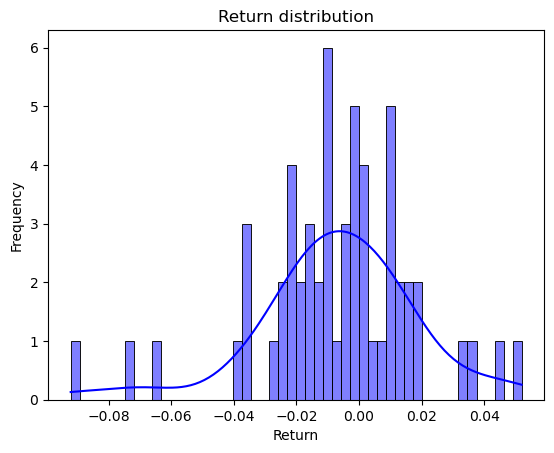

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.histplot(subset['ret(t+1)'], kde=True, color='blue', bins=50)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Return distribution')

plt.show()

## Distribution over all symbols available

In [30]:
# Import data for all symbols

# get column names
query = """
PRAGMA table_info(KLINES_1H)
"""
c.execute(query)
cols = c.fetchall()
col_names = [col[1] for col in cols]

# get klines
query = f"""
SELECT * FROM KLINES_1H
"""
c.execute(query)
data = pd.DataFrame(c.fetchall(), columns=col_names)

data.head()

,Exchange,Product_Type,Symbol,Time,Open,High,Low,Close,Volume,Load_time
0,Bybit,linear,10000LADYSUSDT,2023-05-11 13:00:00,0.001596,0.001646,0.001323,0.001483,2.517803e+09,2023-11-16 11:44:03
1,Bybit,linear,10000LADYSUSDT,2023-05-11 14:00:00,0.001483,0.001484,0.001140,0.001180,5.694230e+09,2023-11-16 11:44:03
2,Bybit,linear,10000LADYSUSDT,2023-05-11 15:00:00,0.001180,0.001387,0.001153,0.001257,3.660606e+09,2023-11-16 11:44:03
3,Bybit,linear,10000LADYSUSDT,2023-05-11 16:00:00,0.001257,0.001344,0.001155,0.001280,3.762433e+09,2023-11-16 11:44:03
4,Bybit,linear,10000LADYSUSDT,2023-05-11 17:00:00,0.001280,0.001283,0.000922,0.000959,5.596139e+09,2023-11-16 11:44:03


In [51]:
# Group data by symbol 

data['return'] = data.groupby('Symbol')['Close'].pct_change()
data['cret(t+2)'] = data.groupby('Symbol')['Close'].pct_change(2).shift(-2)
data['cret(t+3)'] = data.groupby('Symbol')['Close'].pct_change(3).shift(-3)
data['cret(t+5)'] = data.groupby('Symbol')['Close'].pct_change(5).shift(-5)
data['cret(t+8)'] = data.groupby('Symbol')['Close'].pct_change(8).shift(-8)
data['cret(t+13)'] = data.groupby('Symbol')['Close'].pct_change(13).shift(-13)
data

,Exchange,Product_Type,Symbol,Time,Open,High,Low,Close,Volume,Load_time,return,cret(t+12,cret(t+2),cret(t+3),cret(t+5),cret(t+8),cret(t+13)
0,Bybit,linear,10000LADYSUSDT,2023-05-11 13:00:00,0.001596,0.001646,0.001323,0.001483,2.517803e+09,2023-11-16 11:44:03,NaN,-0.152731,-0.152731,-0.136548,-0.420094,-0.303102,-0.521915
1,Bybit,linear,10000LADYSUSDT,2023-05-11 14:00:00,0.001483,0.001484,0.001140,0.001180,5.694230e+09,2023-11-16 11:44:03,-0.204316,0.085169,0.085169,-0.187712,-0.260593,-0.215678,-0.568220
2,Bybit,linear,10000LADYSUSDT,2023-05-11 15:00:00,0.001180,0.001387,0.001153,0.001257,3.660606e+09,2023-11-16 11:44:03,0.064831,-0.237167,-0.237167,-0.315559,-0.076005,-0.324712,-0.627935
3,Bybit,linear,10000LADYSUSDT,2023-05-11 16:00:00,0.001257,0.001344,0.001155,0.001280,3.762433e+09,2023-11-16 11:44:03,0.019101,-0.328387,-0.328387,-0.318626,-0.192893,-0.333073,-0.587661
4,Bybit,linear,10000LADYSUSDT,2023-05-11 17:00:00,0.001280,0.001283,0.000922,0.000959,5.596139e+09,2023-11-16 11:44:03,-0.251464,-0.089724,-0.089724,0.211268,-0.034429,-0.032342,-0.412102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380820,Bybit,linear,ZRXUSDT,2023-11-16 11:00:00,0.526200,0.531600,0.496000,0.502600,1.351704e+07,2023-11-16 16:13:51,-0.044850,-0.033625,-0.033625,-0.050338,NaN,NaN,NaN
3380821,Bybit,linear,ZRXUSDT,2023-11-16 12:00:00,0.502600,0.502700,0.480900,0.485300,1.234876e+07,2023-11-16 16:13:51,-0.034421,-0.016485,-0.016485,-0.027612,NaN,NaN,NaN
3380822,Bybit,linear,ZRXUSDT,2023-11-16 13:00:00,0.485300,0.486400,0.474200,0.485700,8.012878e+06,2023-11-16 16:13:51,0.000824,-0.028413,-0.028413,NaN,NaN,NaN,NaN
3380823,Bybit,linear,ZRXUSDT,2023-11-16 14:00:00,0.485700,0.486200,0.475300,0.477300,6.104481e+06,2023-11-16 16:13:51,-0.017295,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
data[data['Symbol']=='ZRXUSDT']

,Exchange,Product_Type,Symbol,Time,Open,High,Low,Close,Volume,Load_time,return,cret(t+12,cret(t+2)
3366467,Bybit,linear,ZRXUSDT,2022-03-28 10:00:00,0.7444,0.7452,0.7430,0.7445,7580.0,2023-11-16 16:13:37,NaN,-0.009402,-0.009402
3366468,Bybit,linear,ZRXUSDT,2022-03-28 11:00:00,0.7445,0.7512,0.7388,0.7419,134536.0,2023-11-16 16:13:37,-0.003492,-0.003370,-0.003370
3366469,Bybit,linear,ZRXUSDT,2022-03-28 12:00:00,0.7419,0.7484,0.7287,0.7375,536932.0,2023-11-16 16:13:37,-0.005931,0.000271,0.000271
3366470,Bybit,linear,ZRXUSDT,2022-03-28 13:00:00,0.7375,0.7410,0.7366,0.7394,65167.0,2023-11-16 16:13:37,0.002576,-0.021639,-0.021639
3366471,Bybit,linear,ZRXUSDT,2022-03-28 14:00:00,0.7394,0.7394,0.7203,0.7377,252931.0,2023-11-16 16:13:37,-0.002299,-0.013420,-0.013420
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380820,Bybit,linear,ZRXUSDT,2023-11-16 11:00:00,0.5262,0.5316,0.4960,0.5026,13517035.0,2023-11-16 16:13:51,-0.044850,-0.033625,-0.033625
3380821,Bybit,linear,ZRXUSDT,2023-11-16 12:00:00,0.5026,0.5027,0.4809,0.4853,12348755.0,2023-11-16 16:13:51,-0.034421,-0.016485,-0.016485
3380822,Bybit,linear,ZRXUSDT,2023-11-16 13:00:00,0.4853,0.4864,0.4742,0.4857,8012878.0,2023-11-16 16:13:51,0.000824,-0.028413,-0.028413
3380823,Bybit,linear,ZRXUSDT,2023-11-16 14:00:00,0.4857,0.4862,0.4753,0.4773,6104481.0,2023-11-16 16:13:51,-0.017295,NaN,NaN


In [53]:
# filter on returns greater than x

subset = data[data['return'] < 0.05]
subset

,Exchange,Product_Type,Symbol,Time,Open,High,Low,Close,Volume,Load_time,return,cret(t+12,cret(t+2),cret(t+3),cret(t+5),cret(t+8),cret(t+13)
1,Bybit,linear,10000LADYSUSDT,2023-05-11 14:00:00,0.001483,0.001484,0.001140,0.001180,5.694230e+09,2023-11-16 11:44:03,-0.204316,0.085169,0.085169,-0.187712,-0.260593,-0.215678,-0.568220
3,Bybit,linear,10000LADYSUSDT,2023-05-11 16:00:00,0.001257,0.001344,0.001155,0.001280,3.762433e+09,2023-11-16 11:44:03,0.019101,-0.328387,-0.328387,-0.318626,-0.192893,-0.333073,-0.587661
4,Bybit,linear,10000LADYSUSDT,2023-05-11 17:00:00,0.001280,0.001283,0.000922,0.000959,5.596139e+09,2023-11-16 11:44:03,-0.251464,-0.089724,-0.089724,0.211268,-0.034429,-0.032342,-0.412102
5,Bybit,linear,10000LADYSUSDT,2023-05-11 18:00:00,0.000959,0.001026,0.000738,0.000860,9.615344e+09,2023-11-16 11:44:03,-0.102765,0.350000,0.350000,0.201744,-0.013372,-0.175581,-0.159302
6,Bybit,linear,10000LADYSUSDT,2023-05-11 19:00:00,0.000860,0.000998,0.000801,0.000873,7.609193e+09,2023-11-16 11:44:03,0.014535,0.184527,0.184527,0.060745,-0.021203,-0.416046,-0.271060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380820,Bybit,linear,ZRXUSDT,2023-11-16 11:00:00,0.526200,0.531600,0.496000,0.502600,1.351704e+07,2023-11-16 16:13:51,-0.044850,-0.033625,-0.033625,-0.050338,NaN,NaN,NaN
3380821,Bybit,linear,ZRXUSDT,2023-11-16 12:00:00,0.502600,0.502700,0.480900,0.485300,1.234876e+07,2023-11-16 16:13:51,-0.034421,-0.016485,-0.016485,-0.027612,NaN,NaN,NaN
3380822,Bybit,linear,ZRXUSDT,2023-11-16 13:00:00,0.485300,0.486400,0.474200,0.485700,8.012878e+06,2023-11-16 16:13:51,0.000824,-0.028413,-0.028413,NaN,NaN,NaN,NaN
3380823,Bybit,linear,ZRXUSDT,2023-11-16 14:00:00,0.485700,0.486200,0.475300,0.477300,6.104481e+06,2023-11-16 16:13:51,-0.017295,NaN,NaN,NaN,NaN,NaN,NaN


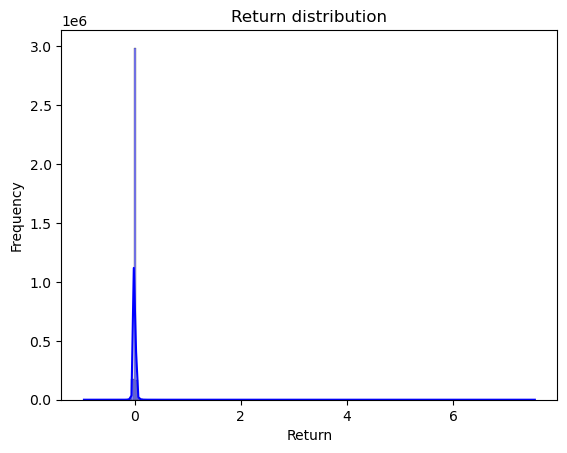

In [54]:
# Plot Returns distribution
sns.histplot(subset['cret(t+2)'], kde=True, color='blue', bins=200)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Return distribution')

plt.show()

In [59]:
mean_value = subset['cret(t+2)'].mean()
'{:.10f}'.format(mean_value)

'-0.0000061487'